###### Tez Projesi Çalışması
###### Çetin KAYA
###### 210904012

# **ÇALIŞAN DÖNÜŞÜM HIZI TAHMİNLEME**#
Giriş
Bu araştırma yıpranmaya bağlı olarak çalışan devir hızının tahminlenmesi ve buna neden faktörlerin ortaya çıkarılmasını amaçlamaktadır.
Kaggle uygulamasından seçilen veri seti üzerinden çeşitli makine öğrenmesi yöntemleri uygulanarak analizler yapılacaktır. Devamında oluşan öğretilen model ile oluşan sonuçlar test edilecektir.

 Çalışan devri ("çalışan kaybı" olarak da bilinir) şirketler için maliyetli bir sorundur. Bir çalışanı değiştirmenin gerçek maliyeti genellikle oldukça yüksek olabilir. Center for American Progress tarafından yapılan bir araştırma, şirketlerin bir çalışanı değiştirmek için genellikle o çalışanın maaşının yaklaşık beşte birini ödediğini ve yöneticiler veya en yüksek maaşlı çalışanlar değiştirilecekse maliyetin önemli ölçüde artabileceğini ortaya koymuştur. Başka bir deyişle, çoğu işveren için çalışanlarını değiştirmenin maliyeti önemli olmaya devam etmektedir. Bunun nedeni, mülakat yapmak ve yerine birini bulmak için harcanan zaman, işe başlama ikramiyeleri ve yeni çalışan yeni rolüne alışırken birkaç ay boyunca yaşanan üretkenlik kaybıdır.



Veri setini "https://www.kaggle.com/code/hamzaben/employee-churn-model-w-strategic-retention-plan" adresinden bulabilirsiniz.


## 1. Veri Setinin Hazırlanması
Veri temizleme ve hazırlama işlemleri veri üzerinde uygun bir analiz yapmak için oldukça önemli bir adımdır. Veri seti kaynağından alınarak düzgün bir formatta proje ortamına aktırılması için hazırlandı. Çalışma ortamı kuruldu.

## 2. Verilerin Alınması

Stratejik Elde Tutma Planı ile Çalışan Kaybı Modeli: Bir İK Analitiği Vaka Çalışması bilgilerini içeren veri seti alınır .

In [281]:
import pandas as pd
from notebooks.utils import *

In [282]:
df = pd.read_excel('data/Tez_Datasi.xlsx')
df.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


## 3. Verinin Temizlenmesi
Veri üzerinde düzenleme yapmak için aşağıdaki işlemler yapılmıştır.
   * Değişken yapıları incelenmiştir.
   * Değişken tipleri incelenmiştir.
   * Tip dönüşümleri yapılmıştır.(Kategorik değişken tipleri object iken float tipe dönüştürülmüştür.)
   * Kategorik olan değişkenler dikey sütün halinde ve yatay sütün haline getirilerek encoding uygulanmıştır.(0,1)
   * Veriye max min scaler uygulanarak outler olan değerlere 0.5 aralığında bir değerler atanarak aralık daratılmıştır.
   * Attration(yıpranma) değerlerindeki dengesizlik için unbalasing metodlar uygulanarak "Evet" sayıları yükseltilmiştir.

#### DEĞİŞKEN YAPILARININ İNCELENMESİ ####

In [283]:
cat_cols, num_cols, cat_but_car = grap_col_names(df)

Observations: 1470
Variables: 35
cat_cols: 9
num_cols: 26
cat_but_car: 0
num_but_cat: 0


In [284]:
print("\n##################### CATEGORIC #####################")
print(cat_cols)

print("\n##################### NUMERIC#####################")
print(num_cols)

print("\n##################### CARDINAL #####################")
print(cat_but_car)

print("\n##################### CLASS COUNT #####################")
df[cat_cols].nunique()


##################### CATEGORIC #####################
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

##################### NUMERIC#####################
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

##################### CARDINAL #####################
[]

##################### CLASS COUNT #####################


Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [285]:
check_df(df)


##################### SHAPE #####################
(1470, 35)

##################### TYPES #####################
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
Relationship

## 4. Verinin Görselleştirilmesi

Veri temizlenip işlendikten sonra görsel verilerin oluşturulacağı veri setleri oluşturulmuştur. Bu veri setleri kullanılarak aşağıdaki görsellere yer verilmiştir.

        Gender  Ration
Male       882    60.0
Female     588    40.0
##########################################



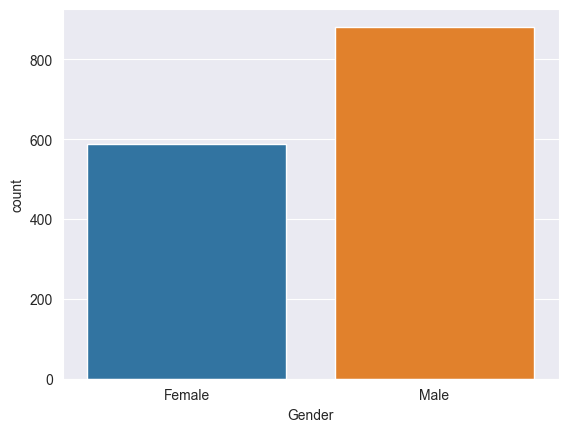

                  EducationField     Ration
Life Sciences                606  41.224490
Medical                      464  31.564626
Marketing                    159  10.816327
Technical Degree             132   8.979592
Other                         82   5.578231
Human Resources               27   1.836735
##########################################



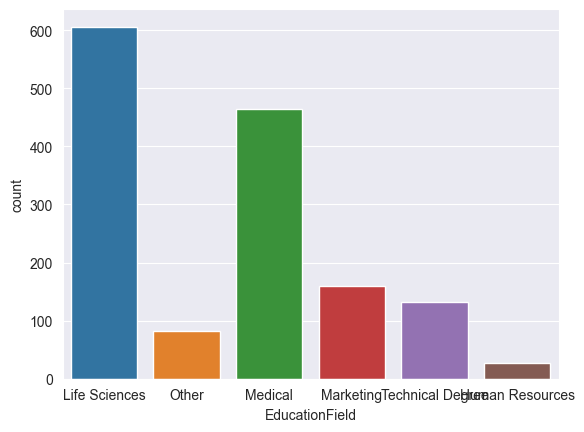

In [286]:
cat_summary(df, "Gender" ,True)
cat_summary(df, "EducationField" ,True)

     Attrition     Ration
No        1233  83.877551
Yes        237  16.122449
##########################################



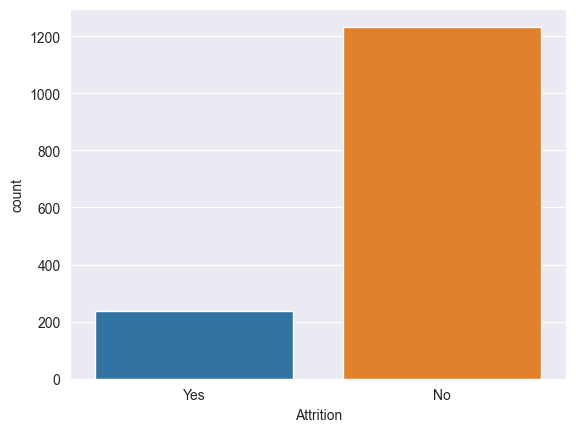

                   BusinessTravel     Ration
Travel_Rarely                1043  70.952381
Travel_Frequently             277  18.843537
Non-Travel                    150  10.204082
##########################################



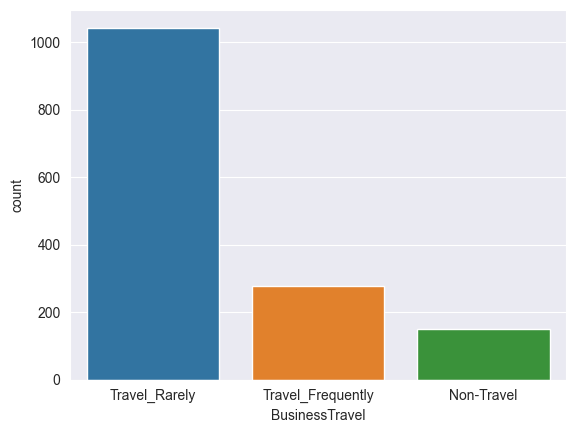

                        Department     Ration
Research & Development         961  65.374150
Sales                          446  30.340136
Human Resources                 63   4.285714
##########################################



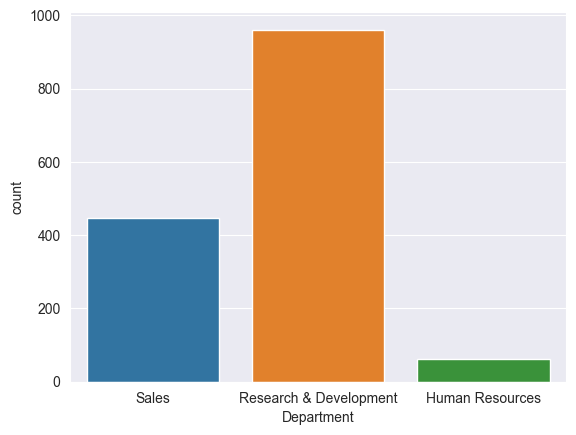

                  EducationField     Ration
Life Sciences                606  41.224490
Medical                      464  31.564626
Marketing                    159  10.816327
Technical Degree             132   8.979592
Other                         82   5.578231
Human Resources               27   1.836735
##########################################



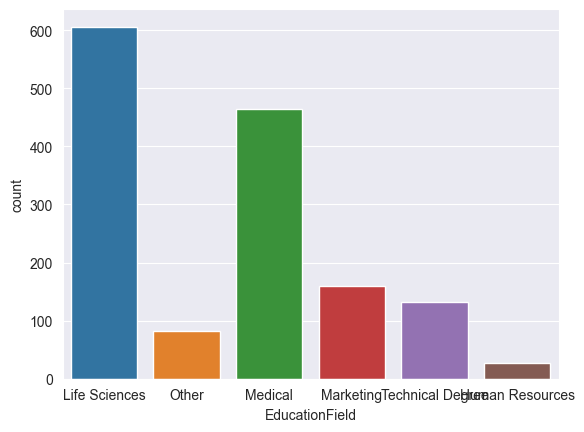

        Gender  Ration
Male       882    60.0
Female     588    40.0
##########################################



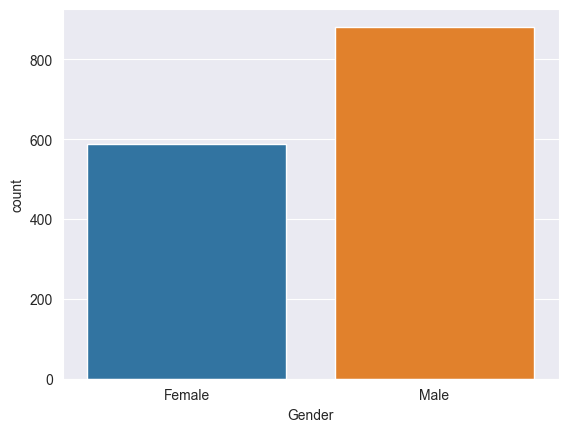

                           JobRole     Ration
Sales Executive                326  22.176871
Research Scientist             292  19.863946
Laboratory Technician          259  17.619048
Manufacturing Director         145   9.863946
Healthcare Representative      131   8.911565
Manager                        102   6.938776
Sales Representative            83   5.646259
Research Director               80   5.442177
Human Resources                 52   3.537415
##########################################



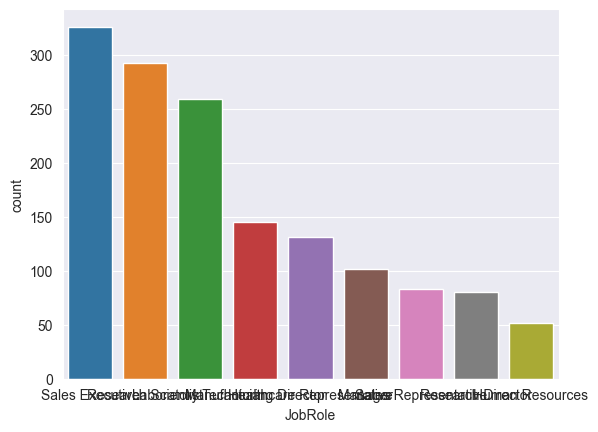

          MaritalStatus     Ration
Married             673  45.782313
Single              470  31.972789
Divorced            327  22.244898
##########################################



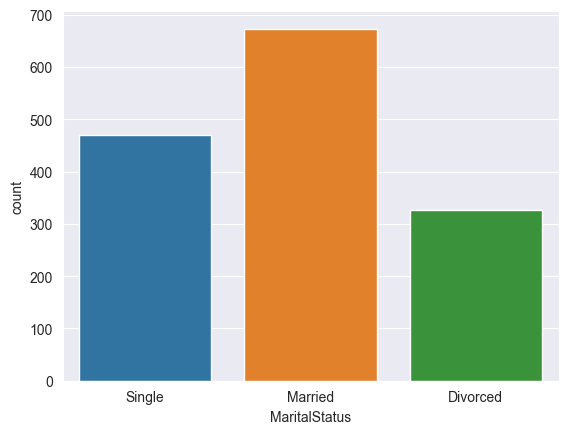

   Over18  Ration
Y    1470   100.0
##########################################



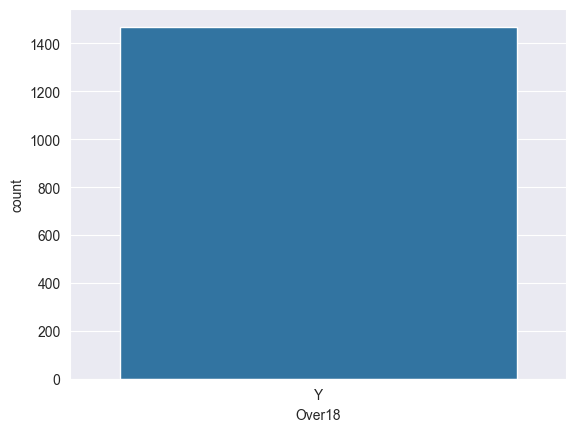

     OverTime    Ration
No       1054  71.70068
Yes       416  28.29932
##########################################



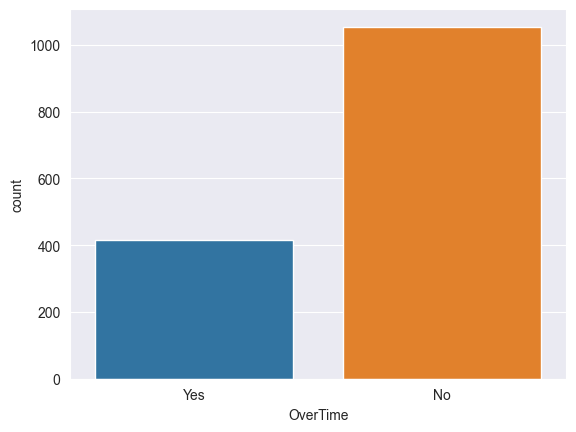

In [287]:
df_cat = df[cat_cols]
for col in df_cat.columns:
    cat_summary(df_cat, col ,True)

In [288]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [289]:
print(df.shape)
df.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [290]:
# Label Encoding will be used for columns with 2 or less unique values (değişkenler pivota çekilir)
"""
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

"""

"\nle_count = 0\nfor col in df.columns[1:]:\n    if df[col].dtype == 'object':\n        if len(list(df[col].unique())) <= 2:\n            le.fit(df[col])\n            df[col] = le.transform(df[col])\n            le_count += 1\nprint('{} columns were label encoded.'.format(le_count))\n\n"

In [291]:
# değişkenler altalta kalır
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        le.fit(df[col])
        df[col] = le.transform(df[col])
        le_count += 1
print('{} columns were label encoded.'.format(le_count))

9 columns were label encoded.


In [292]:

df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [293]:
# convert rest of categorical variable into dummy
df= pd.get_dummies(df, drop_first=True)

In [294]:
print(df.shape)
df.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [295]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [296]:
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error

In [297]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(df.columns)
HR_col.remove('Attrition')
for col in HR_col:
    df[col] = df[col].astype(float)
    df[[col]] = scaler.fit_transform(df[[col]])
df['Attrition'] = pd.to_numeric(df['Attrition'], downcast='float')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2.738095,1.0,5.0,3.579098,5.0,0.000000,1.25,1.0,0.0,0.000000,...,0.000000,0.0,0.000000,1.000,0.0,0.000000,0.75,1.111111,0.000000,1.470588
1,3.690476,0.0,2.5,0.633500,2.5,1.250000,0.00,1.0,0.0,0.002419,...,5.000000,0.0,1.666667,1.250,2.5,3.333333,1.25,1.944444,0.333333,2.058824
2,2.261905,1.0,5.0,4.549034,2.5,0.178571,1.25,4.0,0.0,0.007257,...,1.666667,0.0,0.000000,0.875,2.5,3.333333,0.00,0.000000,0.000000,0.000000
3,1.785714,0.0,2.5,4.617037,2.5,0.357143,3.75,1.0,0.0,0.009676,...,3.333333,0.0,0.000000,1.000,2.5,3.333333,1.00,1.944444,1.000000,0.000000
4,1.071429,0.0,5.0,1.750179,2.5,0.178571,0.00,3.0,0.0,0.014514,...,5.000000,0.0,1.666667,0.750,2.5,3.333333,0.25,0.555556,0.666667,0.588235


## Imbalance data check and resampling the attrition "yes" data

In [298]:
#imbalanced data control
df['Attrition'].value_counts()
#The class in an imbalanced classification predictive modeling problem that has slightly more examples.
#thus, there is no imbalanced data problem, but we can add some sampling in data get equal sample

0.0    1233
1.0     237
Name: Attrition, dtype: int64

In [299]:
from sklearn.utils import resample
df1 = df.copy()
#create two different dataframe of majority and minority class
df_majority = df1[(df1['Attrition']==0)]
df_minority = df1[(df1['Attrition']==1)]
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= 1233, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])
df_upsampled.reset_index(drop = True, inplace = True)
df_upsampled.head()
df = df_upsampled

<Axes: >

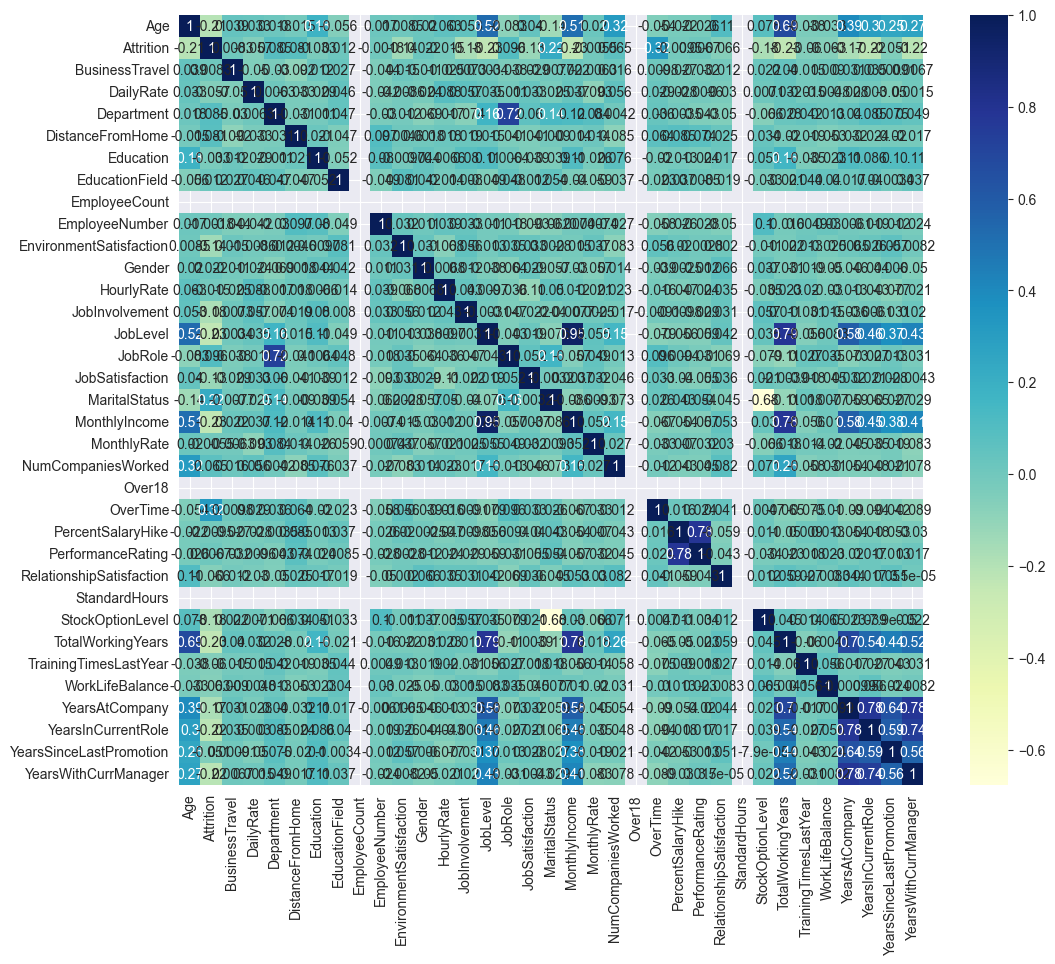

In [300]:
#correlation check
plt.figure(figsize= (12,10))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')

In [301]:
print('Size of Full Encoded Dataset: {}'. format(df.shape))

Size of Full Encoded Dataset: (2466, 35)


In [ ]:
# assign the target to a new dataframe and convert it to a numerical feature
#df_target = df_HR[['Attrition']].copy()
target = df['Attrition'].copy()

In [303]:
type(target)

pandas.core.series.Series

In [304]:
"""

# let's remove the target feature and redundant features from the dataset
df.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber',
            'StandardHours', 'Over18'], axis=1, inplace=True)
print('Size of Full dataset is: {}'.format(df.shape))

"""

"\n\n# let's remove the target feature and redundant features from the dataset\ndf.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber',\n            'StandardHours', 'Over18'], axis=1, inplace=True)\nprint('Size of Full dataset is: {}'.format(df.shape))\n\n"

In [305]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.357143,1.0,5.0,4.742305,2.5,3.035714,0.00,4.0,0.0,2.230285,...,0.000000,0.0,0.0,0.125,2.500000,1.666667,0.125,0.000000,0.000000,0.000000
1,1.904762,1.0,5.0,2.462419,5.0,4.107143,3.75,3.0,0.0,3.599419,...,3.333333,0.0,0.0,2.000,1.666667,5.000000,1.875,2.500000,3.333333,2.941176
2,4.761905,1.0,5.0,0.658554,2.5,0.178571,3.75,1.0,0.0,1.993227,...,5.000000,0.0,0.0,5.000,1.666667,3.333333,3.875,4.166667,4.333333,2.352941
3,3.333333,1.0,5.0,2.029349,5.0,1.428571,1.25,3.0,0.0,0.283019,...,5.000000,0.0,0.0,1.125,2.500000,3.333333,1.125,2.222222,1.333333,2.058824
4,0.833333,1.0,5.0,2.738010,5.0,3.214286,1.25,2.0,0.0,2.300435,...,3.333333,0.0,5.0,0.125,1.666667,3.333333,0.125,0.000000,0.000000,0.000000


In [306]:

y=df["Attrition"]
X=df.drop(["Attrition",  'EmployeeCount', 'EmployeeNumber',
            'StandardHours', 'Over18'] , axis = 1)


## 5.Verilerin İşlenmesi

Ön işlemeden geçirilen veri üzerinde özelik seçimi yapılarak modller uygulanmıştır.

## Multicollinear check with VIF value

In [307]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] =X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                     feature        VIF
0                        Age   9.188565
1             BusinessTravel   6.866975
2                  DailyRate   3.883006
3                 Department  14.715201
4           DistanceFromHome   2.114111
5                  Education   4.641172
6             EducationField   3.764919
7    EnvironmentSatisfaction   3.053826
8                     Gender   2.530559
9                 HourlyRate   4.116427
10            JobInvolvement   5.668218
11                  JobLevel  20.517577
12                   JobRole   9.977281
13           JobSatisfaction   3.157774
14             MaritalStatus   6.586366
15             MonthlyIncome  24.504563
16               MonthlyRate   3.835185
17        NumCompaniesWorked   2.758937
18                  OverTime   1.715499
19         PercentSalaryHike   5.982063
20         PerformanceRating   3.136334
21  RelationshipSatisfaction   3.393086
22          StockOptionLevel   2.927511
23         TotalWorkingYears  13.908133


In [308]:

#Evaluating the model
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss, f1_score
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer, precision_score, classification_report
from sklearn.metrics import average_precision_score
from  sklearn import model_selection

#Splitting the data
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5, random_state=5, shuffle=True)


#Scaling the features with StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


#Hyperparameter tuning with RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
#Define random forest classifier


scaler = StandardScaler()
model = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_leaf= 8, random_state=12, n_jobs=-1)

##Accuracy score ve confusion matrix'i tutmak için değişkenlerimizi tanımlayalım
acc_results = []
auc_results = []

exp_var_scrr=np.array([])
mean_abs_scrr=np.array([])

pred_y=[]
#roc için değişkenlerim
y_tested=[]
X_tested=[]

df_results = pd.DataFrame(columns=X.columns)
i = 0

#enumerate splits
for train, test in kfold.split(X,y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    model.fit(X_train, y_train.values.ravel())
    y_pred=model.predict(X_test)
    #y_test değerlerinin bir araya getirelim
    #y_tested=np.append(y_tested,y_test)
    #y_tested=y_tested.reshape(-1,1)
    #X_tested=np.append(X_tested, X_test)
    #X_tested=X_tested.reshape(-1,3)
    exp_var_scrr=np.append(exp_var_scrr, explained_variance_score(y_test, y_pred))
    mean_abs_scrr=np.append(mean_abs_scrr, mean_absolute_error(y_test, y_pred))

    #accuracy and auc eval.
    acc_results.append(model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy'))
    auc_results.append(model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc'))

    print("confusion matrix\n", confusion_matrix(y_test, y_pred) )
    print("recall matrix\n", recall_score(y_test, y_pred, average=None))
    print("precision matrix\n", precision_score(y_test, y_pred, average=None, zero_division=0))
    print("f1 score\n", f1_score(y_test, y_pred, average=None, zero_division=0))
    print(classification_report(y_test, y_pred))


print("Her bir kat için açıklanan varyasyon değeri:\n", exp_var_scrr)
print("Ortalama açıklanan varyasyon değeri:", np.mean(exp_var_scrr))
print("Her bir kat için ortalama mutlak hata:\n", mean_abs_scrr)
print("Katların ortalama mutlak hata değeri:", np.mean(mean_abs_scrr))

print("Katların ortalama ROC (Receiver operating characteristic değeri:", np.mean(auc_results))
print("Katların ortalama acc değeri:", np.mean(acc_results))



confusion matrix
 [[230  19]
 [  9 236]]
recall matrix
 [0.92369478 0.96326531]
precision matrix
 [0.9623431 0.9254902]
f1 score
 [0.94262295 0.944     ]
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       249
         1.0       0.93      0.96      0.94       245

    accuracy                           0.94       494
   macro avg       0.94      0.94      0.94       494
weighted avg       0.94      0.94      0.94       494

confusion matrix
 [[211  30]
 [ 21 231]]
recall matrix
 [0.87551867 0.91666667]
precision matrix
 [0.90948276 0.88505747]
f1 score
 [0.89217759 0.9005848 ]
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89       241
         1.0       0.89      0.92      0.90       252

    accuracy                           0.90       493
   macro avg       0.90      0.90      0.90       493
weighted avg       0.90      0.90      0.90       493

confusion matrix
 [[214  26]
 [ 13 2

## Farklı yöntemle bölme ve verileri eğitme

In [309]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y, shuffle=True)

## KNN Classifier with GridSearchCV

In [310]:
from sklearn.neighbors import KNeighborsClassifier
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.9093631848172585
Best Parameters: {'n_neighbors': 1}


In [311]:
#KNN searching best n_neighbor value manually
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [312]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 93.55231143552312 % and k = [1]


## Confusion matrix and Classification report

In [313]:
#import confusion_matrix
y_pred1 = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred1)
pd.crosstab(y_test, y_pred1, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,334,77,411
1.0,119,292,411
All,453,369,822


Text(0.5, 23.52222222222222, 'Predicted label')

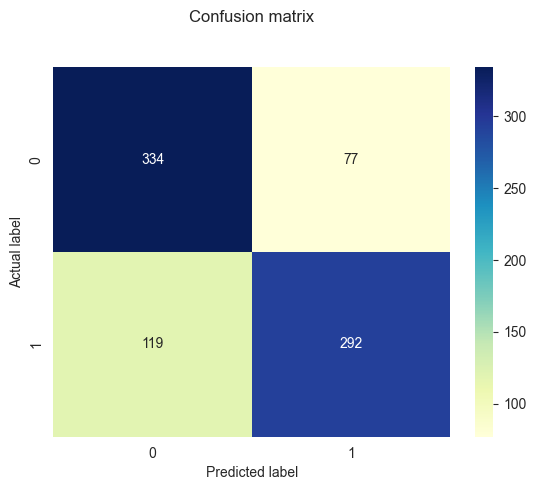

In [314]:
# Creating a Heatmap for the confusion matrix.
y_pred1 = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred1)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [315]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       0.74      0.81      0.77       411
         1.0       0.79      0.71      0.75       411

    accuracy                           0.76       822
   macro avg       0.76      0.76      0.76       822
weighted avg       0.76      0.76      0.76       822



In [316]:
import warnings
warnings.filterwarnings('ignore')

## Logistic Regression with GridSearchCV for parameter tuning

In [317]:
##Appy Logistic regression
from sklearn.linear_model import LogisticRegression
lg_reg = LogisticRegression(random_state = 2)

#import GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {
    'penalty' : ['l1','l2', 'elasticnet'],
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
log_reg = LogisticRegression(random_state = 2)
logreg_cv= GridSearchCV(log_reg,parameters, cv=5)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=2),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [318]:
y_pred1 = logreg_cv.predict(X_test)

In [319]:
print("Best Score:" + str(logreg_cv.best_score_))
print("Best Parameters: " + str(logreg_cv.best_params_))

Best Score:0.763384980354363
Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


In [320]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78       411
         1.0       0.77      0.82      0.80       411

    accuracy                           0.79       822
   macro avg       0.79      0.79      0.79       822
weighted avg       0.79      0.79      0.79       822



## SVM Model with GridSearchCV and Evaluation

In [333]:
### Apply SVM model

from sklearn.svm import SVC
clssfr = SVC(random_state = 2)
parameters = {
    'kernel'  : ['linear',  'sigmoid'],
    'C'       : np.logspace(-3,3)
}
clssfr_cv= GridSearchCV(clssfr,parameters, cv=5)
clssfr_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=2),
             param_grid={'C': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10298178e-02, 1.20679264e-01, 1.5998587...
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03]),
                         'kernel': ['linear', 'sigmoid']})

GridSearchCV(cv=5, estimator=SVC(random_state=2),
             param_grid={'C': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10298178e-02, 1.20679264e-01, 1.5998587...
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03]),
                         'kernel': ['linear', 'sigmoid']})

In [334]:
print(clssfr_cv.predict(X_test))
print("Best Score:" + str(clssfr_cv.best_score_))
print("Best Parameters: " + str(clssfr_cv.best_params_))

[0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.

In [335]:
y_pred = clssfr_cv.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79       411
         1.0       0.78      0.81      0.80       411

    accuracy                           0.79       822
   macro avg       0.79      0.79      0.79       822
weighted avg       0.79      0.79      0.79       822

              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79       411
         1.0       0.78      0.81      0.80       411

    accuracy                           0.79       822
   macro avg       0.79      0.79      0.79       822
weighted avg       0.79      0.79      0.79       822



## Decision tree and parameter tuning and evaluation

In [336]:
### Apply Decision tree model

from sklearn.tree import DecisionTreeClassifier
clssfr_dcsn_tree = DecisionTreeClassifier(random_state = 2)

parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_leaf'       : np.arange(1,10)

}
clssfr_dcsn_tree_cv= GridSearchCV(clssfr_dcsn_tree, parameters, cv=5)
clssfr_dcsn_tree_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [325]:
print(clssfr_dcsn_tree_cv.predict(X_test))
print("Best Score:" + str(clssfr_dcsn_tree_cv.best_score_))
print("Best Parameters: " + str(clssfr_dcsn_tree_cv.best_params_))

[0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.

In [326]:
y_pred = clssfr_dcsn_tree_cv.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.85      0.91       411
         1.0       0.87      0.99      0.93       411

    accuracy                           0.92       822
   macro avg       0.93      0.92      0.92       822
weighted avg       0.93      0.92      0.92       822



## RandomForest with best parameters and evaluation

In [327]:
### Apply Random Forest model

from sklearn.ensemble import RandomForestClassifier
clssfr = RandomForestClassifier(random_state = 2)

parameters = {

 'max_depth': np.arange(4,10),
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 3],
 'n_estimators': [100,  300]

}

clssfr_cv= GridSearchCV(clssfr, parameters, cv=5)
clssfr_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'max_depth': array([4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3],
                         'n_estimators': [100, 300]})

In [328]:
print(clssfr_cv.predict(X_test))
print("Best Score:" + str(clssfr_cv.best_score_))
print("Best Parameters: " + str(clssfr_cv.best_params_))

[0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.

In [329]:
y_pred = clssfr_cv.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95       411
         1.0       0.92      0.98      0.95       411

    accuracy                           0.95       822
   macro avg       0.95      0.95      0.95       822
weighted avg       0.95      0.95      0.95       822



## NaiveBayes and Evaluation

In [330]:
### Apply Naive Bayes model
from sklearn.naive_bayes import BernoulliNB
clssfr = BernoulliNB()

#import GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {
    'alpha':[1,0]


}
clssfr_cv= GridSearchCV(clssfr,parameters, cv=5)
clssfr_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=BernoulliNB(), param_grid={'alpha': [1, 0]})

In [331]:
print(clssfr_cv.predict(X_test))
print("Best Score:" + str(clssfr_cv.best_score_))
print("Best Parameters: " + str(clssfr_cv.best_params_))

[0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1.

In [332]:
y_pred = clssfr_cv.predict(X_test)
from sklearn.metrics import classification_report




print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75       411
         1.0       0.75      0.74      0.75       411

    accuracy                           0.75       822
   macro avg       0.75      0.75      0.75       822
weighted avg       0.75      0.75      0.75       822

